In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

1. Let consider the following ODE

$$
\begin{cases}
-k\dfrac{d^2u}{dx^2} + u &= &g(x), \quad \text{ on } [0,2]\\[0.3cm]
u(0) =\alpha\\
u(2) =\beta
\end{cases}
$$

The discretize for of the above equation is given by

$$
\begin{cases}
-\dfrac{k}{h^2}(u_{i-1}-2u_i+u_{i+1})+u_i &= & g(x_i), \quad i = 1,\cdots,N-1\\[0.3cm]
u_0  = \alpha\\
u_N = \beta
\end{cases}
$$

The system can be written in matrix form as:$\quad AU = B$

Write a python function <b> Mat_Ab</b> that takes <b>a,b,k,h,g, $\alpha$, $\beta$ </b> and returns the matrix $A$ and vector $B$.

Note that <b>a</b> and <b>b</b> are respectively the lower and upper bound of the interval on which the equation is defined. 

In [15]:
def Mat_Ab(a,b,k,h,g,alpha,beta):
    N = int((b-a)/h)
    x = np.linspace(a,b,N+1)
    A = np.zeros((N+1,N+1))
    B = np.zeros(N+1)
    A[0,0] = 1
    B[0] = alpha
    A[-1,-1] = 1
    B[-1] = beta
    for i in range(1,N):
        A[i,i-1] = -k/h**2 
        A[i,i] =  (3*k) / h**2
        A[i,i+1] = -k/h**2
        B[i]=g(x[i])
    return A, B

2. Solve the system with $\alpha= 1, h= 0.01, g(x)= e^{2x}, k=4$ and $\beta=3$

In [17]:
a = 0
b = 2
alpha = 1
beta = 3
k = 4
h = 0.01

g = lambda x: np.exp(2*x)

A,B = Mat_Ab(a,b,k,h,g,alpha,beta)


3. Tha exact solution  of the above equation is given by

$$u(x) = \dfrac{3e}{e^2-1}e^{\frac{x}{2}}+\dfrac{3e}{1-e^2}e^{-\frac{x}{2}}$$

Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

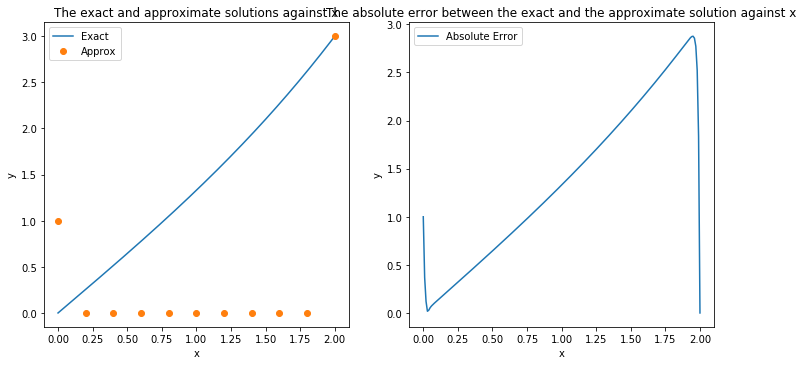

In [21]:
U_F =  lambda x: ((3*np.exp(1))/(np.exp(2) - 1)) * (np.exp(x/2)) + (((3*np.exp(1))/(1 - np.exp(2))) * np.exp(-x/2))

N = int((b-a)/h)
x = np.linspace(0,2,N+1)
U_Exact = U_F(x)
U_Approx = np.linalg.solve(A,B)

plt.figure(figsize=(12,5.6))
plt.subplot(1,2,1)
plt.plot(x,U_Exact)
plt.plot(x[::20],U_Approx[::20],'o')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Exact","Approx"])
plt.title("The exact and approximate solutions against x")


plt.subplot(1,2,2)
plt.plot(x,abs(U_Exact - U_Approx))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Absolute Error"])
plt.title("The absolute error between the exact and the approximate solution against x")

plt.show()

In [7]:
np.exp(1)

2.718281828459045

In [8]:
np.exp(1)

2.718281828459045